# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('car data (2).csv')


# Data analysis

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape  # check the shape of the data

(301, 9)

In [5]:
data.columns    # find the feature or columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
data.describe()  # describe mean count, , std, min, q1 , q2, q3, max
# you can observe that selling price, presen price and kms_driven are having the outliers


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# In the given information, 5 are categorical feature(with target 0 and 1 value) and other are numerical feature 

In [9]:
#### check the missing value
data.isnull().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# there is no null value present in the given dataset

In [11]:
#### check the correlation for each feature with the target variable. Correlation will be finding between the
# only numerical feature.
corr=data.corr()
corr['Owner'].sort_values(ascending=False)

Owner            1.000000
Kms_Driven       0.089216
Present_Price    0.008057
Selling_Price   -0.088344
Year            -0.182104
Name: Owner, dtype: float64

In [15]:
# nor we will find the num_year_car_old so we create a new columns and subtract the year columns
data['Current_year']=2021

In [16]:
data['Num_year']=data['Current_year'] - data['Year']

In [17]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Num_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [18]:
#now check the again correlation
corr=data.corr()  
corr['Owner'].sort_values(ascending=False)

Owner            1.000000
Num_year         0.182104
Kms_Driven       0.089216
Present_Price    0.008057
Selling_Price   -0.088344
Year            -0.182104
Current_year          NaN
Name: Owner, dtype: float64

In [19]:
# drop the year and car_name, current_year
data=data.drop(['Year', 'Current_year', 'Car_Name'], axis=1)

In [20]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [21]:
# convert the categorical feature into dummies variable (numerical feature)
data=pd.get_dummies(data, drop_first=True)

In [22]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# Data visualization

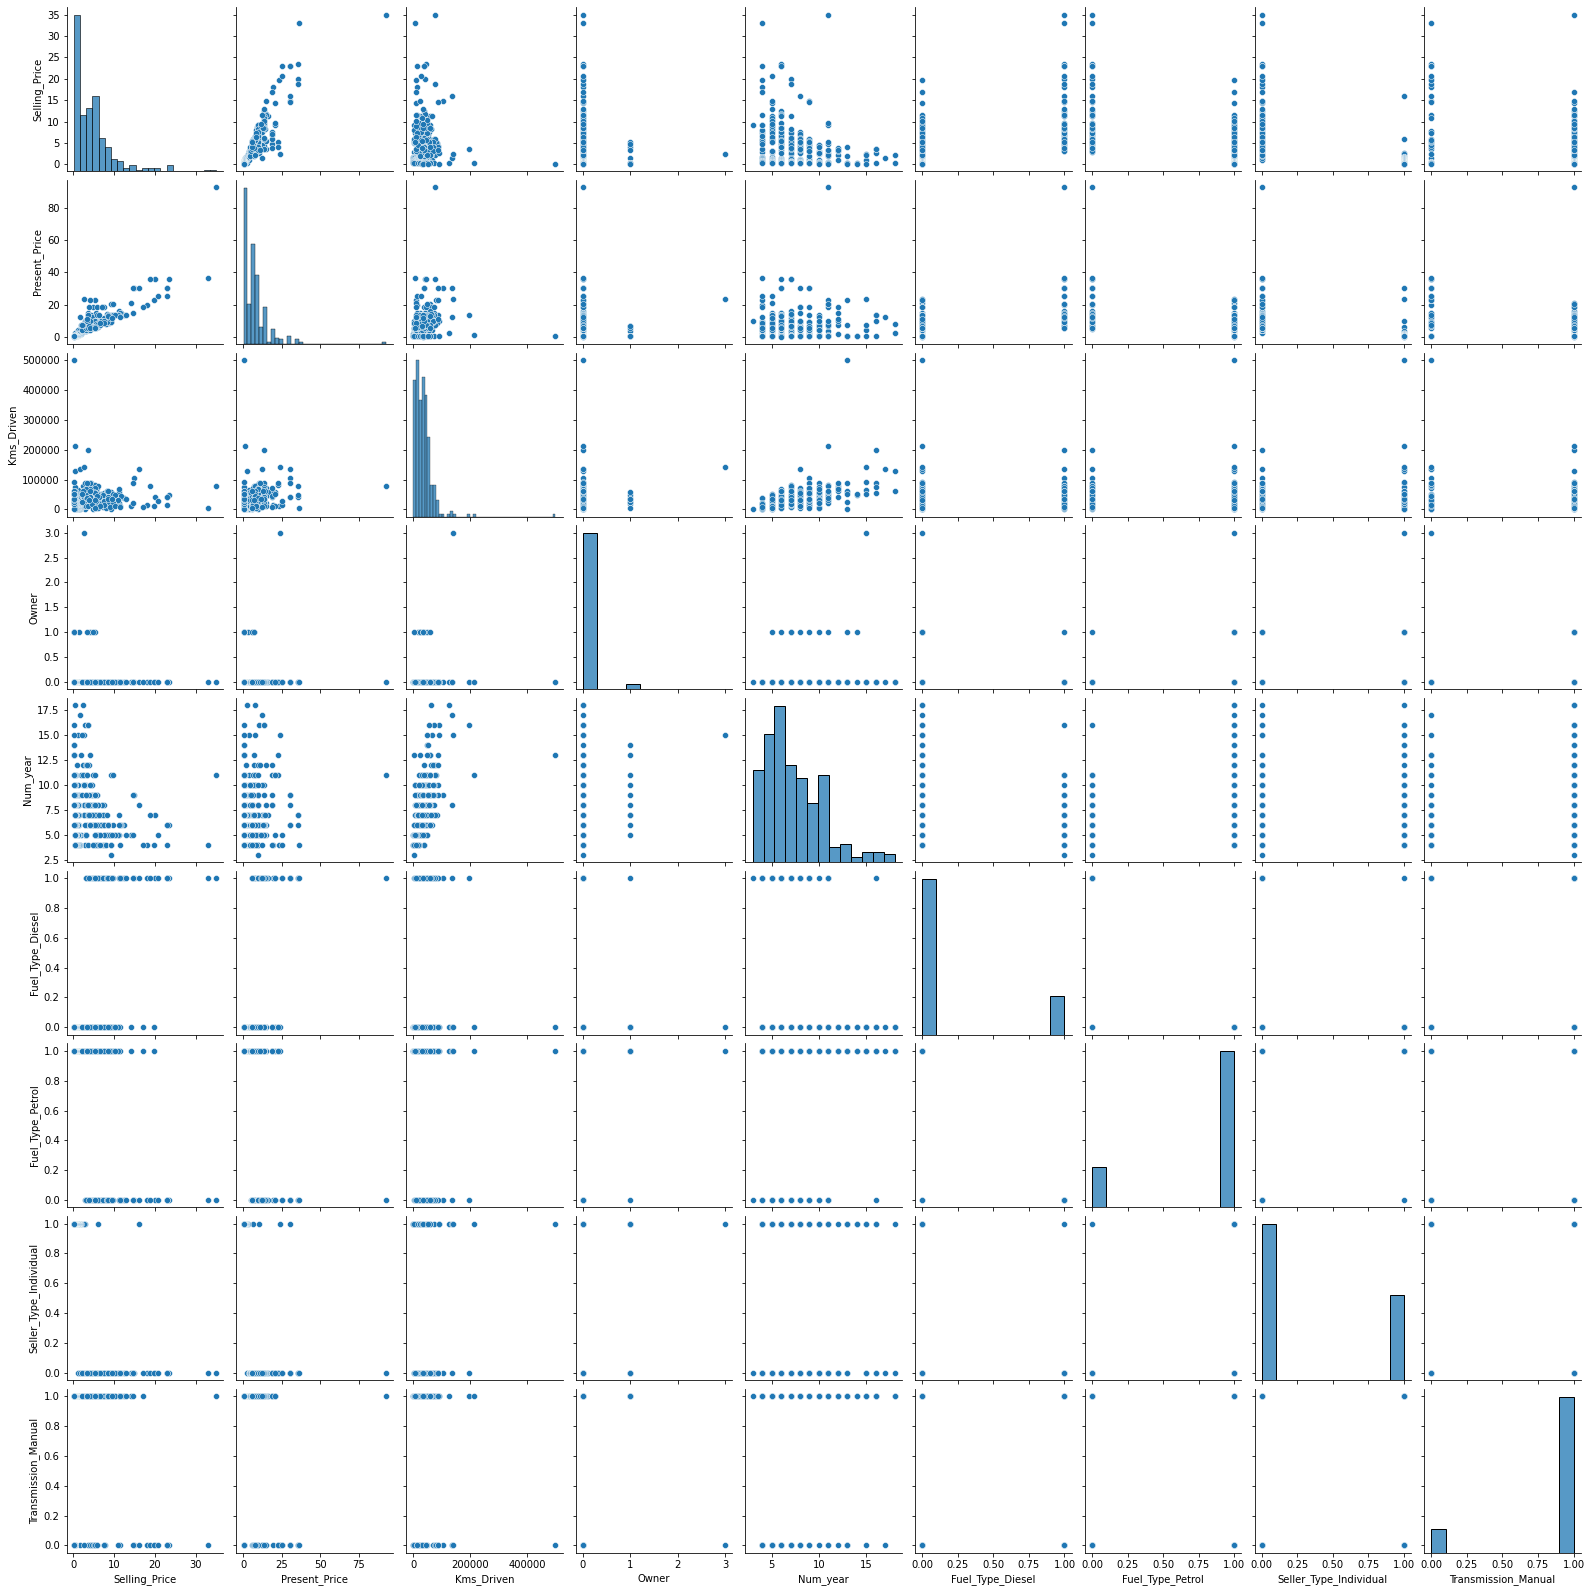

In [23]:
sns.pairplot(data)

/home/sumit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner', ylabel='count'>

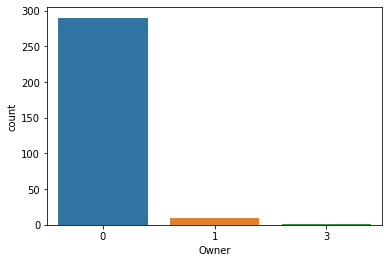

In [24]:
sns.countplot(data['Owner'])

<AxesSubplot:xlabel='Transmission_Manual', ylabel='count'>

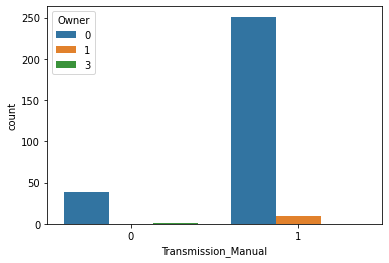

In [26]:
sns.countplot(x='Transmission_Manual', hue='Owner', data=data)

<AxesSubplot:ylabel='Kms_Driven'>

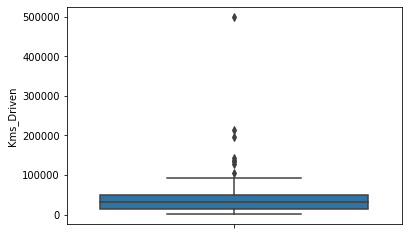

In [29]:
# check the outlier 
sns.boxplot(y=data['Kms_Driven'])

<AxesSubplot:>

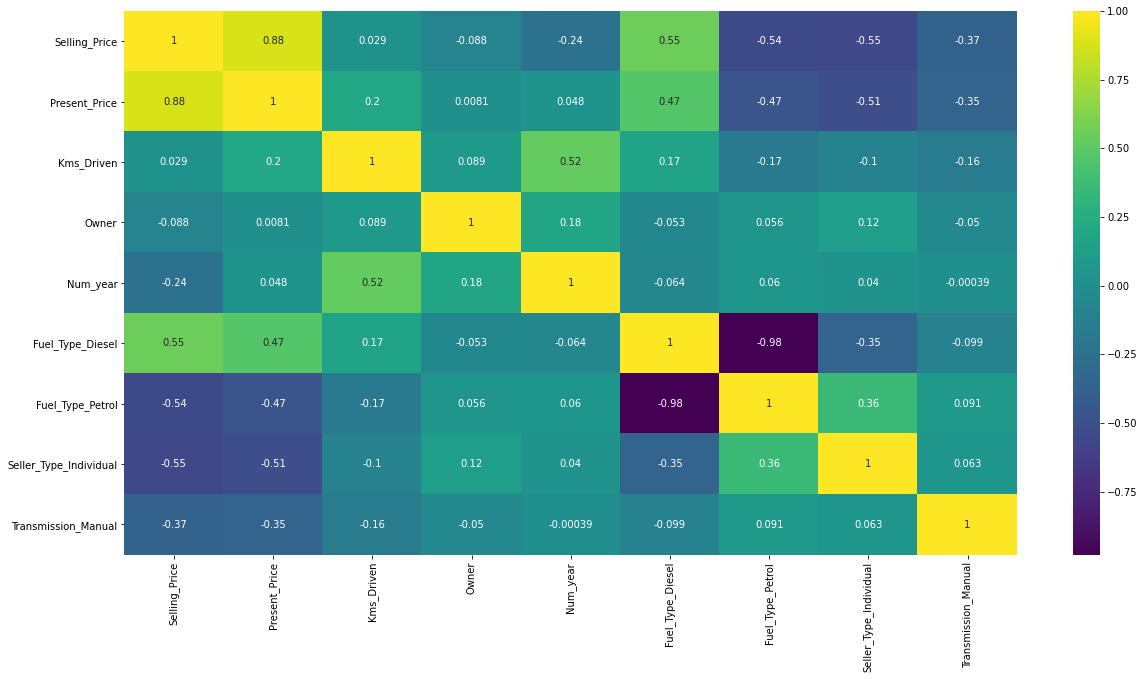

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, cmap='viridis')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Num_year                301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [88]:
data=pd.get_dummies(data)

# data preprocessing steps

In [89]:
# divide the data into dependent and independent set
X=data.drop('Selling_Price', axis=1)
Y=data['Selling_Price']

In [90]:
# now we will check the feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X, Y)

ExtraTreesRegressor()

In [91]:
print(model.feature_importances_)

[3.80204446e-01 3.90049316e-02 3.58589549e-04 8.01721338e-02
 2.21403746e-01 1.48981293e-02 1.27871926e-01 1.36086098e-01]


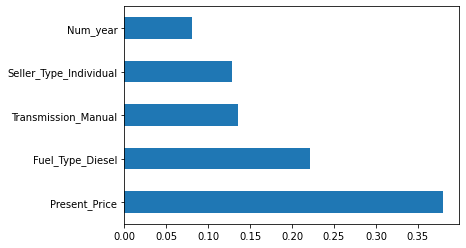

In [92]:
# plot the grap of feature importance
feature_import=pd.Series(model.feature_importances_, index=X.columns)
feature_import.nlargest(5).plot(kind='barh')
plt.show()

# Model building and Evaluation 

In [93]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.metrics import r2_score

X_train, X_test, Y_train ,Y_test=train_test_split(X, Y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((240, 8), (61, 8), (240,), (61,))

In [94]:
# results=pd.DataFrame({'model':[], 'accuracy_score': []})


In [95]:
# models=[]
# models.append(('LinearREgression', LinearRegression()))
# models.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)))
# models.append(('RandomForestRegressor', RandomForestRegressor()))

In [96]:
# for name, model in models:
#     model.fit(X_train, Y_train)
#     pred=model.predict(X_test)
#     score=accuracy_score(Y_test, pred)
#     temp_result=pd.DataFrame({'model':[name], 'accuracy_score':[score]})
#     results=np.concat([results, temp_result], axis=0)
#     print("%s : %f" +(name, score))

# Linear REgression

In [97]:
model1=LinearRegression()
model1.fit(X_train, Y_train)
print("tranining set score :", model1.score(X_train, Y_train))
print("Testing set score :", model1.score(X_test, Y_test))

tranining set score : 0.8886517300804564
Testing set score : 0.8489813024899082


In [98]:
predict1=model1.predict(X_test)
print('MAE : ', mean_absolute_error(Y_test, predict1))
print("MSE :", mean_squared_error(Y_test, predict1))
print('RMSE :', np.sqrt(mean_squared_error(Y_test, predict1)))
r2_score1=r2_score(Y_test, predict1)
print('R2 score :', r2_score1)      

MAE :  1.2162256821296993
MSE : 3.4788039706378644
RMSE : 1.865155213551372
R2 score : 0.8489813024899082


# DEcisionTreeREgressor

In [99]:
model2=DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)
model2.fit(X_train, Y_train)
print("tranining set score :", model2.score(X_train, Y_train))
print("Testing set score :", model2.score(X_test, Y_test))


tranining set score : 0.9274198715787114
Testing set score : 0.9189981427458941


In [100]:
predict2=model2.predict(X_test)
print('MAE : ', mean_absolute_error(Y_test, predict2))
print("MSE :", mean_squared_error(Y_test, predict2))
print('RMSE :', np.sqrt(mean_squared_error(Y_test, predict2)))
r2_score2=r2_score(Y_test, predict2)
print('R2 score :', r2_score2)     

MAE :  0.8972346592387574
MSE : 1.865925129077442
RMSE : 1.3659887002012285
R2 score : 0.9189981427458941


# RandomForestRegressor 

In [101]:
model3=RandomForestRegressor()
model3.fit(X_train, Y_train)
print("tranining set score :", model3.score(X_train, Y_train))
print("Testing set score :", model3.score(X_test, Y_test))

tranining set score : 0.9841094159686149
Testing set score : 0.9567717006955925


In [102]:
predict3=model3.predict(X_test)
print('MAE :', mean_absolute_error(Y_test, predict3))
print("MSE :", mean_squared_error(Y_test, predict3))
print("RMSE :", np.sqrt( mean_squared_error(Y_test, predict3)))
r2_score3=r2_score(Y_test, predict3)
print('R2 score :', r2_score3)

MAE : 0.6564032786885252
MSE : 0.9957891422950825
RMSE : 0.9978923500533925
R2 score : 0.9567717006955925


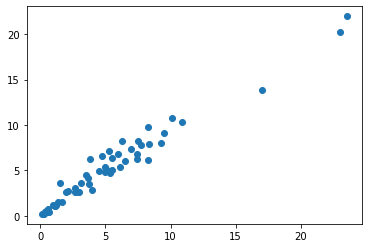

In [103]:
plt.scatter(Y_test,predict3)


/home/sumit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

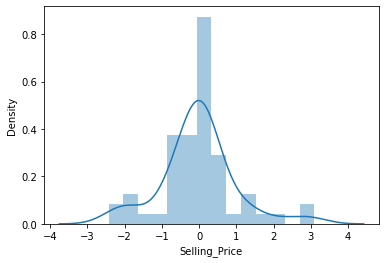

In [104]:
sns.distplot(Y_test-predict3)


In [105]:
result=pd.DataFrame({'Model':['LinearRegression', "DecisionTreeREgressor", 'RandomForestREgressor'],
                   'R2_score':[r2_score1, r2_score2, r2_score3]})


In [106]:
result

,Model,R2_score
0,LinearRegression,0.848981
1,DecisionTreeREgressor,0.918998
2,RandomForestREgressor,0.956772


In [107]:
import pickle

with open("my_file.pkl", "wb") as h:
    pickle.dump(model3, h)